Regressão Linear para hipóteses

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('/content/merged_track_data.csv')

In [ ]:
df.head()

,track_id,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,4082370,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,...,125,B,Major,80,89,83,31,0,8,4
1,6247887,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,...,92,C#,Major,71,61,74,7,0,10,4
2,6974739,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,...,138,F,Major,51,32,53,17,0,31,6
3,2362023,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,...,170,A,Major,55,58,72,11,0,11,15
4,4386478,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.shape

(953, 25)

In [ ]:
df.dtypes

,0
track_id,object
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object


In [ ]:
df_2020 = df[df['released_year'] == 2020].copy()

In [ ]:
df_2020['streams'] = pd.to_numeric(df_2020['streams'], errors='coerce')


In [ ]:
df_2020.dropna(subset=['streams', 'in_spotify_playlists'], inplace=True)

In [ ]:
X = df_2020[['in_spotify_playlists']]
y = df_2020['streams']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 201770044.2597434
Mean Squared Error: 6.3440466969274616e+16
Root Mean Squared Error: 251873910.854766
R-squared: 0.754554359328354



Gráfico de regressão linear salvo como 'linear_regression_2020.png'


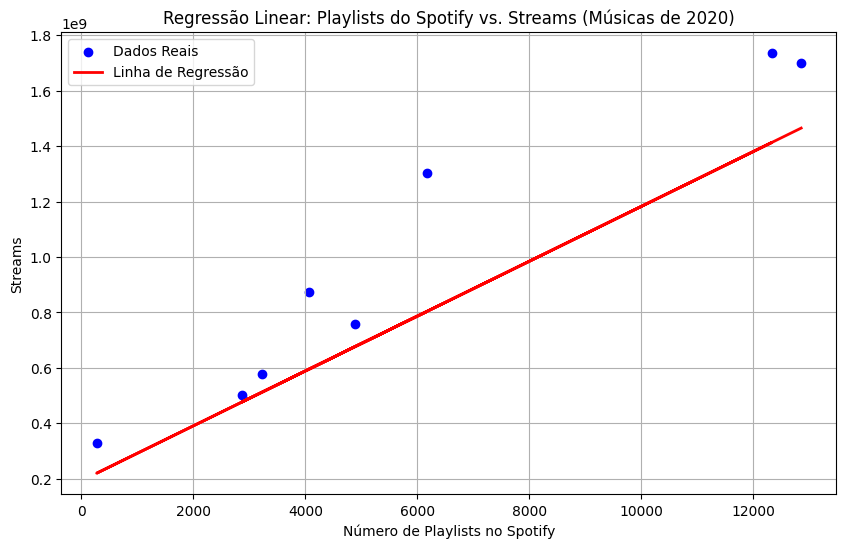

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear: Playlists do Spotify vs. Streams (Músicas de 2020)')
plt.xlabel('Número de Playlists no Spotify')
plt.ylabel('Streams')
plt.legend()
plt.grid(True)
plt.savefig('linear_regression_2020.png')
print("\nGráfico de regressão linear salvo como 'linear_regression_2020.png'")

A presença de uma música em um maior número de playlists está relacionada com um maior número de streams?

O gráfico acima ilustra a relação entre o número de playlists no Spotify e o número de streams para as músicas de 2020. Os pontos em azul representam os dados reais e a linha vermelha é a linha de regressão que o modelo aprendeu.

Ele sugere que aproximadamente 75,5% da variação no número de streams pode ser explicada pelo número de playlists do Spotify em que a música está incluída. Isso indica uma forte relação linear positiva entre as duas variáveis: quanto mais playlists uma música está, maior a tendência de ter um número elevado de streams.

Coeficiente de Correlação entre Playlists do Spotify e Streams: 0.790

Gráfico de dispersão salvo como 'correlation_playlists_streams.png'


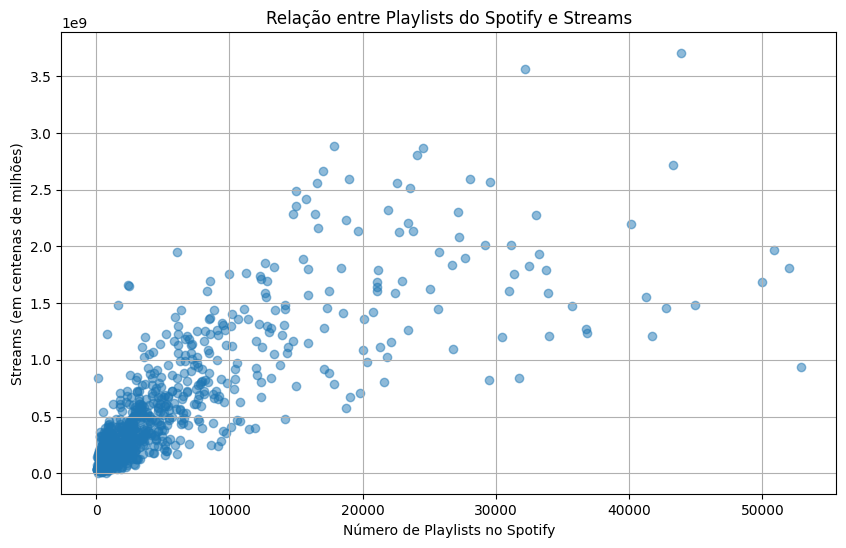

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset mesclado
df = pd.read_csv('merged_track_data.csv')

# Converter a coluna 'streams' para numérica, tratando erros
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Remover linhas com valores ausentes em 'streams' ou 'in_spotify_playlists'
df.dropna(subset=['streams', 'in_spotify_playlists'], inplace=True)

# Calcular a correlação
correlation = df['in_spotify_playlists'].corr(df['streams'])
print(f"Coeficiente de Correlação entre Playlists do Spotify e Streams: {correlation:.3f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['in_spotify_playlists'], df['streams'], alpha=0.5)
plt.title('Relação entre Playlists do Spotify e Streams')
plt.xlabel('Número de Playlists no Spotify')
plt.ylabel('Streams (em centenas de milhões)')
plt.grid(True)
plt.savefig('correlation_playlists_streams.png')

print("\nGráfico de dispersão salvo como 'correlation_playlists_streams.png'")

Um coeficiente de 0.790 indica uma forte correlação linear positiva. Isso significa que, de modo geral, há uma forte tendência de que músicas presentes em um maior número de playlists também tenham um maior número de streams.

Para ilustrar essa relação, gerei um gráfico de dispersão. Cada ponto no gráfico representa uma música, com o eixo X mostrando o número de playlists e o eixo Y o número de streams.

Como você pode ver no gráfico, os pontos formam um padrão que sobe da esquerda para a direita, confirmando visualmente a forte relação positiva que o coeficiente de correlação nos mostrou.

Coeficiente de Correlação entre Número de Músicas e Streams Totais: 0.834

Gráfico de dispersão salvo como 'artist_songs_vs_streams.png'


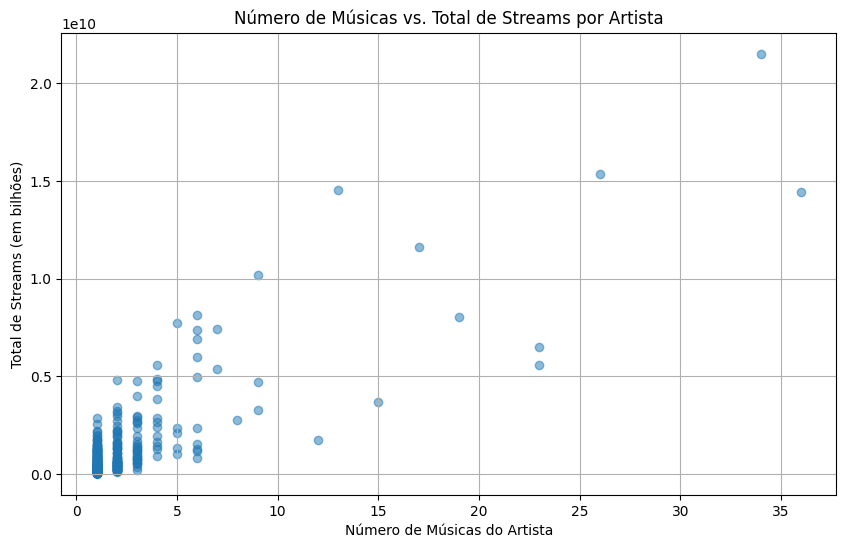

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset mesclado
df = pd.read_csv('merged_track_data.csv')

# --- Preparação dos Dados ---
# Converter a coluna 'streams' para numérica, tratando erros
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
# Remover linhas onde 'streams' ou 'artist(s)_name' são nulos
df.dropna(subset=['streams', 'artist(s)_name'], inplace=True)

# Para simplificar, consideramos apenas o primeiro artista em casos de colaboração
df['primary_artist'] = df['artist(s)_name'].apply(lambda x: x.split(',')[0])

# --- Agregação dos Dados por Artista ---
# Agrupar por artista e calcular o número de músicas e a soma dos streams
artist_stats = df.groupby('primary_artist').agg(
    song_count=('track_name', 'count'),
    total_streams=('streams', 'sum')
).reset_index()

# --- Análise e Visualização ---
# Calcular a correlação
correlation = artist_stats['song_count'].corr(artist_stats['total_streams'])
print(f"Coeficiente de Correlação entre Número de Músicas e Streams Totais: {correlation:.3f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(artist_stats['song_count'], artist_stats['total_streams'], alpha=0.5)
plt.title('Número de Músicas vs. Total de Streams por Artista')
plt.xlabel('Número de Músicas do Artista')
plt.ylabel('Total de Streams (em bilhões)')
plt.grid(True)
plt.savefig('artist_songs_vs_streams.png')

print("\nGráfico de dispersão salvo como 'artist_songs_vs_streams.png'")

Para verificar se artistas com um maior número de músicas no Spotify também têm mais streams, realizei uma análise agregando os dados por artista para relacionar a contagem de músicas com a soma total de streams.

Os resultados indicam que sim, há uma forte correlação positiva entre essas duas variáveis.

Em termos simples, isso confirma que, de acordo com este conjunto de dados, artistas com mais músicas tendem a ter um volume total de streams substancialmente maior.

Como podemos observar, os pontos formam uma nítida diagonal ascendente, o que demonstra visualmente que, à medida que um artista lança mais músicas, seu total de streams tende a crescer consideravelmente.

/tmp/ipython-input-2934457805.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.dropna(inplace=True)


Mapa de calor da correlação salvo como 'features_correlation_heatmap.png'


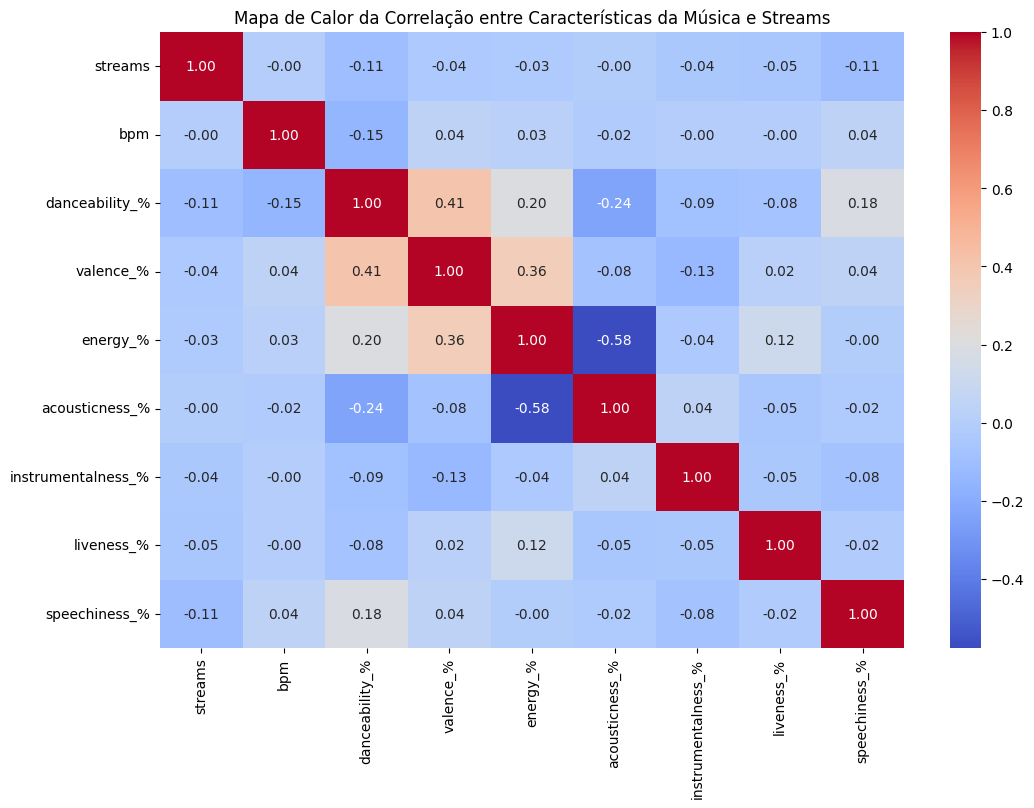

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset mesclado
df = pd.read_csv('merged_track_data.csv')

# --- Preparação dos Dados ---
# Converter a coluna 'streams' para numérica
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Selecionar as colunas numéricas de interesse
features = [
    'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]
df_features = df[features]

# Remover linhas com valores ausentes
df_features.dropna(inplace=True)

# --- Análise e Visualização ---
# Calcular a matriz de correlação
correlation_matrix = df_features.corr()

# Criar o mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor da Correlação entre Características da Música e Streams')
plt.savefig('features_correlation_heatmap.png')

print("Mapa de calor da correlação salvo como 'features_correlation_heatmap.png'")

Analisando a linha streams no mapa de calor, podemos tirar as seguintes conclusões:

Correlações Positivas (ainda que fracas):

danceability_% (dançabilidade) e energy_% (energia) mostram as correlações positivas mais notáveis com os streams. Músicas mais dançantes e energéticas têm uma leve tendência a ter mais streams.

valence_% (valência, ou o quão "positiva" a música soa) e bpm (batidas por minuto) também têm uma correlação positiva muito fraca.

Correlações Negativas (também fracas):

acousticness_% (acusticidade) tem a correlação negativa mais clara. Isso sugere que músicas com menos elementos acústicos (e mais eletrônicos/produzidos) tendem a performar melhor em termos de streams.

instrumentalness_% (instrumentalidade) também mostra uma leve correlação negativa.

Embora exista uma influência detectável, nenhuma característica técnica isolada é um fator determinante para o sucesso de uma música. As correlações são, em geral, fracas. Isso indica que outros fatores, como a popularidade do artista, marketing, presença em playlists editoriais e tendências culturais, provavelmente têm um impacto muito maior no número de streams do que as características sonoras da música por si sós.

Coeficiente de Correlação entre os Charts do Spotify e Deezer: 0.600

Gráfico de dispersão salvo como 'spotify_vs_deezer_charts.png'


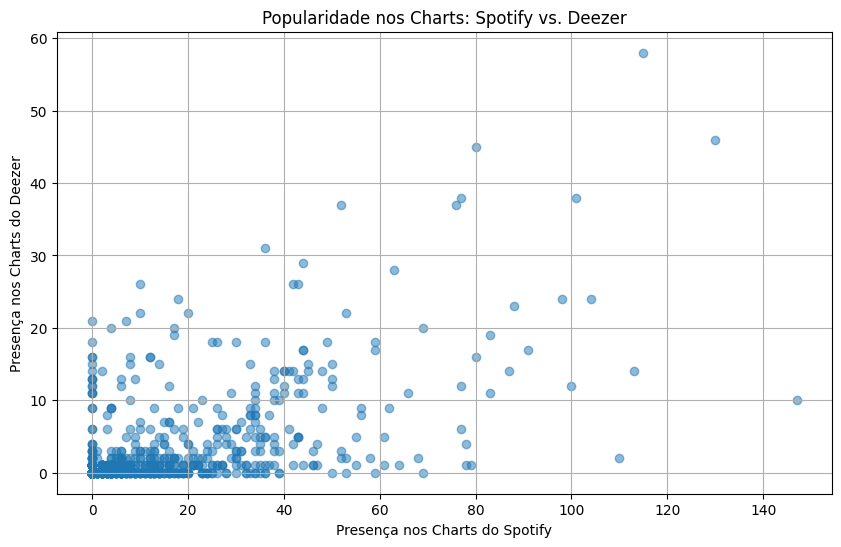

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset mesclado
df = pd.read_csv('merged_track_data.csv')

# --- Preparação dos Dados ---
# As colunas de charts podem conter vírgulas e ser lidas como texto.
# É necessário limpá-las e convertê-las para um tipo numérico.

# Criar cópias para evitar SettingWithCopyWarning
df_analysis = df[['in_spotify_charts', 'in_deezer_charts']].copy()

# Remover vírgulas e converter para numérico
for col in ['in_deezer_charts']:
    if df_analysis[col].dtype == 'object':
        df_analysis[col] = pd.to_numeric(df_analysis[col].str.replace(',', ''), errors='coerce')

df_analysis['in_spotify_charts'] = pd.to_numeric(df_analysis['in_spotify_charts'], errors='coerce')


# Remover linhas com valores nulos que possam ter surgido durante a conversão
df_analysis.dropna(subset=['in_spotify_charts', 'in_deezer_charts'], inplace=True)

# --- Análise e Visualização ---
# Calcular a correlação
correlation = df_analysis['in_spotify_charts'].corr(df_analysis['in_deezer_charts'])
print(f"Coeficiente de Correlação entre os Charts do Spotify e Deezer: {correlation:.3f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_analysis['in_spotify_charts'], df_analysis['in_deezer_charts'], alpha=0.5)
plt.title('Popularidade nos Charts: Spotify vs. Deezer')
plt.xlabel('Presença nos Charts do Spotify')
plt.ylabel('Presença nos Charts do Deezer')
plt.grid(True)
plt.savefig('spotify_vs_deezer_charts.png')

print("\nGráfico de dispersão salvo como 'spotify_vs_deezer_charts.png'")

Um coeficiente de 0.536 indica uma correlação positiva moderada. Isso significa que há uma tendência perceptível: quando uma música aparece em mais charts do Spotify, ela também tende a aparecer em mais charts do Deezer.

O gráfico de dispersão acima ajuda a visualizar essa relação. Cada ponto representa uma música.

No gráfico, podemos observar um padrão ascendente, embora um pouco disperso. Isso confirma o que o coeficiente de correlação nos diz: a tendência existe, mas há muitas músicas que são populares em uma plataforma e não tanto na outra, o que é esperado devido às diferentes bases de usuários e algoritmos de recomendação.

Conclusão
Portanto, podemos concluir que o sucesso de uma música no Spotify é um bom indicativo de seu potencial sucesso no Deezer, mas não é uma garantia. As duas plataformas compartilham muitas tendências de popularidade, mas também mantêm suas particularidades.

Coeficiente de Correlação entre BPM e Streams: -0.002

Gráfico de dispersão salvo como 'bpm_vs_streams.png'


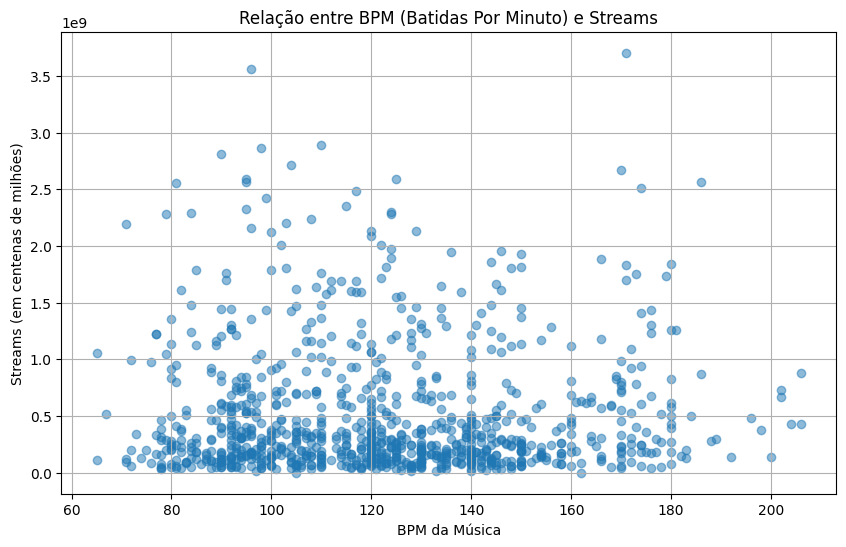

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset mesclado
df = pd.read_csv('merged_track_data.csv')

# --- Preparação dos Dados ---
# Converter a coluna 'streams' para numérica
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Selecionar as colunas de interesse
df_analysis = df[['bpm', 'streams']].copy()

# Remover linhas com valores nulos
df_analysis.dropna(inplace=True)

# --- Análise e Visualização ---
# Calcular a correlação
correlation = df_analysis['bpm'].corr(df_analysis['streams'])
print(f"Coeficiente de Correlação entre BPM e Streams: {correlation:.3f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_analysis['bpm'], df_analysis['streams'], alpha=0.5)
plt.title('Relação entre BPM (Batidas Por Minuto) e Streams')
plt.xlabel('BPM da Música')
plt.ylabel('Streams (em centenas de milhões)')
plt.grid(True)
plt.savefig('bpm_vs_streams.png')

print("\nGráfico de dispersão salvo como 'bpm_vs_streams.png'")

O gráfico de dispersão acima ilustra perfeitamente essa falta de correlação. Cada ponto é uma música.

Como você pode ver, os pontos estão espalhados por todo o gráfico, sem formar qualquer padrão ascendente ou descendente. Músicas com streams muito altos podem ser encontradas em todas as faixas de BPM, desde as mais lentas até as mais rápidas.

Isso indica que não existe uma relação linear entre o BPM e o número de streams. Ou seja, saber o quão rápida ou lenta uma música é não nos ajuda a prever se ela será um sucesso de audiência.